In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# download data
bitcoin = yf.download("BTC-USD", start="2010-01-01", end="2020-12-31")
t_bill = yf.download("^TNX", start="2010-01-01", end="2020-12-31")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [55]:
bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704


In [56]:
t_bill.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,0.920,0.973,0.918,0.955,0.955,0
2020-12-24,0.940,0.941,0.923,0.928,0.928,0
2020-12-28,0.953,0.958,0.931,0.933,0.933,0
2020-12-29,0.950,0.950,0.928,0.935,0.935,0
2020-12-30,0.943,0.945,0.925,0.926,0.926,0


In [31]:
# clean and organize data
bitcoin = bitcoin.dropna()
t_bill = t_bill.dropna()

In [50]:
# match date range for both datasets
start_date = "2021-01-01"
end_date = "2021-12-31"

In [51]:
bitcoin = bitcoin.loc[start_date:end_date]
t_bill = t_bill.loc[start_date:end_date]

In [52]:
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [48]:
# re-sampling to the same frequency
bitcoin = bitcoin.resample("D").mean()
t_bill = t_bill.resample("D").mean()

ValueError: x and y must be the same size

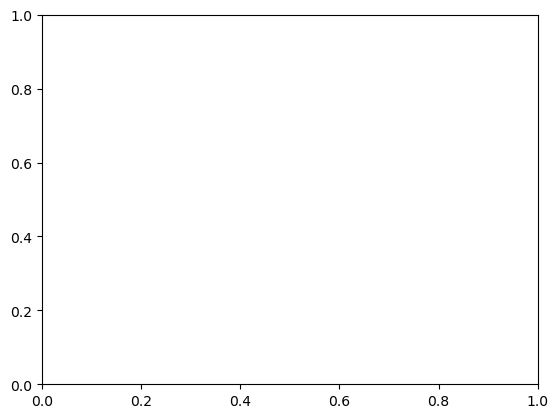

In [49]:
# create scatter plot
plt.scatter(bitcoin["Close"], t_bill["Close"])
plt.xlabel("Bitcoin Price")
plt.ylabel("10 Year T-Bill Yield")
plt.show()

In [45]:
# calculate correlation coefficient
corr = bitcoin["Close"].corr(t_bill["Close"])
print(corr)

nan


In [46]:
# perform statistical test
from scipy.stats import pearsonr

corr, p_value = pearsonr(bitcoin["Close"], t_bill["Close"])
print(corr)
print(p_value)

ValueError: x and y must have length at least 2.